In [82]:
import pandas as pd
from IPython.display import HTML

In [83]:
# The function below is useful when I disply dataframes.
# We can display multiple dataframes side by side.
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [84]:
maps_scores = pd.read_csv("../data/vct_2022/matches/maps_scores.csv")
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,6,7,NaN,EDward Gaming,11,5,6,NaN,1:16:34
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,2,3,NaN,EDward Gaming,13,3,10,NaN,40:51
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,7,6,NaN,EDward Gaming,8,3,5,NaN,NaN
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,8,5,NaN,Team Liquid,10,6,4,NaN,1:04:37
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,6,7,NaN,Team Liquid,10,4,6,NaN,1:05:07


In [85]:
overview = pd.read_csv("../data/vct_2022/matches/overview.csv")
overview["Agents"] = overview["Agents"].apply(lambda x: str(x).replace(" ",""))
overview["Player"] = overview["Player"].apply(lambda x: str(x).replace(" ",""))
overview.head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.31,242.0,...,16.0,13.0,6.0,88%,156.0,34%,1.0,0.0,1.0,both
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.18,243.0,...,9.0,5.0,2.0,75%,167.0,32%,0.0,0.0,0.0,attack
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Benkai,Paper Rex,fade,1.45,242.0,...,7.0,8.0,4.0,100%,146.0,35%,1.0,0.0,1.0,defend
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.15,219.0,...,16.0,7.0,4.0,88%,140.0,33%,0.0,4.0,-4.0,both
4,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,d4v41,Paper Rex,sage,1.04,222.0,...,9.0,4.0,1.0,100%,147.0,29%,0.0,2.0,-2.0,attack


In [86]:
# We don't need all rows from "overview" and the following are index.
ind1 = (overview.Map != "All Maps")    
ind2 = (overview.Side == "both")
ind = (ind1 & ind2)

# We also need only the following features from overview and maps_scores.
overview_keystolook = ["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team", "Agents"]
maps_scores_keystolook = ["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team B", "Team B Score"]

In [87]:
overview_subset = overview[ind][overview_keystolook]
maps_scores_subset = maps_scores[maps_scores_keystolook]

display(overview_subset.head())
display(maps_scores_subset.head())

,Tournament,Stage,Match Type,Match Name,Map,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,raze


,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team B,Team B Score
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,13,EDward Gaming,11
1,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Icebox,Paper Rex,5,EDward Gaming,13
2,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Haven,Paper Rex,13,EDward Gaming,8
3,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Haven,Leviatán,13,Team Liquid,10
4,Valorant Champions 2022,Group Stage,Opening (A),Leviatán vs Team Liquid,Ascent,Leviatán,13,Team Liquid,10


In [88]:
# I want to define a funtion to get columns of individual characters to do linear regression on maps and agents.
# The following dictionary has all available characters in 2022 tournaments.  Characters played in other years are contained in this dictionary.
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade"},
             "controller": {"brimstone", "omen", "viper", "astra"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber"}}  
allagents = set()
for role, agents in roles.items():
    allagents = allagents.union(roles[role])

In [89]:
overview_subset = overview_subset[overview_subset["Agents"].isin(allagents)]
overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,Agents
0,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,fade
3,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,sage
6,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,astra
9,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,chamber
12,Valorant Champions 2022,Group Stage,Opening (A),Paper Rex vs EDward Gaming,Pearl,Paper Rex,raze
...,...,...,...,...,...,...,...
379827,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,raze
379830,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,kayo
379833,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,viper
379836,Champions Tour CIS Stage 1: Challengers 1,Closed Qualifier,Grand Final,Natus Vincere vs FunPlus Phoenix,Split,FunPlus Phoenix,astra


In [90]:
agentpick = {}  # Create dictionary with agent pick information.
for agent in allagents:
    agentpick[agent] = overview_subset.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"], as_index=False).agg(lambda x: int(agent in set(x)))["Agents"]


In [91]:
# Add agentpick data to overview_subset after removing repeated matches from it.
overview_subset = overview_subset.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"], as_index=False).agg("sum")

for agent, pick in agentpick.items():
    overview_subset.loc[:, agent] = pick

overview_subset = overview_subset.drop(columns="Agents")

overview_subset

,Tournament,Stage,Match Type,Match Name,Map,Team,brimstone,sage,omen,phoenix,...,astra,breach,reyna,viper,chamber,neon,jett,killjoy,kayo,fade
0,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,CERBERUS Esports,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Ascent,Made in Thailand,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
2,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,CERBERUS Esports,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
3,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (A),Made in Thailand vs CERBERUS Esports,Bind,Made in Thailand,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Champions Tour Asia-Pacific Stage 1: Challenge...,Group Stage,Decider (B),Persija Esports vs Bonkers,Bind,Bonkers,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17683,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Global Esports vs M1syl and friends,Breeze,M1syl and friends,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
17684,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,God Particles,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
17685,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Ascent,Maruti Peek,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
17686,Valorant Conquerors Championship,Wildcard Qualifier,Upper Bracket Semifinals,Maruti Peek vs God Particles,Breeze,God Particles,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [92]:
# want to check if all agent composition is valid.  That is, it consists of 5 agents.
(overview_subset[list(allagents)].sum(axis=1) != 5).sum()


59

In [93]:
# 59 is not so big, considering our data size. Let's drop invalid rows
overview_valid_comp = overview_subset[overview_subset[list(allagents)].sum(axis=1) == 5]

In [94]:
Team_A_agent_name_label = {}
Team_B_agent_name_label = {}

for agent in allagents:
    Team_A_agent_name_label[agent] = f"{agent}_A"
    Team_B_agent_name_label[agent] = f"{agent}_B"


In [95]:
print(overview_valid_comp.keys())
print(maps_scores_subset.keys())
overview_valid_comp.info()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team',
       'brimstone', 'sage', 'omen', 'phoenix', 'cypher', 'raze', 'yoru',
       'sova', 'skye', 'astra', 'breach', 'reyna', 'viper', 'chamber', 'neon',
       'jett', 'killjoy', 'kayo', 'fade'],
      dtype='object')
Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team B', 'Team B Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 17629 entries, 0 to 17687
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  17629 non-null  object
 1   Stage       17629 non-null  object
 2   Match Type  17629 non-null  object
 3   Match Name  17629 non-null  object
 4   Map         17629 non-null  object
 5   Team        17629 non-null  object
 6   brimstone   17629 non-null  int64 
 7   sage        17629 non-null  int64 
 8   omen        17629 non-null  int64 
 9   phoenix     17

In [96]:
vct_2022_team_comp\
    = maps_scores_subset\
        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
        .join(overview_valid_comp\
            .rename(columns={"Team":"Team A"})\
                .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
        )\
        .reset_index()\
        .rename(columns=Team_A_agent_name_label)\
        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
        .join(overview_valid_comp\
            .rename(columns={"Team":"Team B"})\
                .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
        )\
        .reset_index()\
        .rename(columns=Team_B_agent_name_label)\

len(vct_2022_team_comp)

8884

In [97]:
# We have data for 8884 before remove null.  We can check after apply dropna(), we have 8733 matches left, which is not bad.
vct_2022_team_comp = vct_2022_team_comp.dropna()
print(len(vct_2022_team_comp))


8733


In [98]:
# Let's add Team_A_win and Team_B_win columns to indicate which team won a given match.
vct_2022_team_comp["Team_A_win"] = ((vct_2022_team_comp["Team A Score"] - vct_2022_team_comp["Team B Score"]) > 0)
vct_2022_team_comp["Team_B_win"] = ((vct_2022_team_comp["Team B Score"] - vct_2022_team_comp["Team A Score"]) > 0)


In [99]:
# Let's get dummie variables for "Map"
onehot = pd.get_dummies(vct_2022_team_comp["Map"], prefix="map", prefix_sep="_")

vct_2022_agent_pick = vct_2022_team_comp.drop(columns="Map")\
                                        .join(onehot)\



In [100]:
vct_2022_agent_pick.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Team B', 'Team A',
       'Team A Score', 'Team B Score', 'brimstone_A', 'sage_A', 'omen_A',
       'phoenix_A', 'cypher_A', 'raze_A', 'yoru_A', 'sova_A', 'skye_A',
       'astra_A', 'breach_A', 'reyna_A', 'viper_A', 'chamber_A', 'neon_A',
       'jett_A', 'killjoy_A', 'kayo_A', 'fade_A', 'brimstone_B', 'sage_B',
       'omen_B', 'phoenix_B', 'cypher_B', 'raze_B', 'yoru_B', 'sova_B',
       'skye_B', 'astra_B', 'breach_B', 'reyna_B', 'viper_B', 'chamber_B',
       'neon_B', 'jett_B', 'killjoy_B', 'kayo_B', 'fade_B', 'Team_A_win',
       'Team_B_win', 'map_Ascent', 'map_Bind', 'map_Breeze', 'map_Fracture',
       'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split'],
      dtype='object')

### Let's try some models on this data set.
X: team composition information\
y_aw: Team_A_win\
y_bw: Team_B_win\
y_amb: Score difference for A = (Team_A_Score - Team_B_Score)\
y_bma: Score difference for B = (Team_B_Score - Team_A_Score)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [102]:
X_features = ['cypher_A', 'sova_A', 'chamber_A',
       'sage_A', 'breach_A', 'neon_A', 'reyna_A', 'fade_A', 'viper_A',
       'kayo_A', 'killjoy_A', 'yoru_A', 'brimstone_A', 'astra_A', 'phoenix_A',
       'skye_A', 'omen_A', 'raze_A', 'jett_A', 'cypher_B', 'sova_B',
       'chamber_B', 'sage_B', 'breach_B', 'neon_B', 'reyna_B', 'fade_B',
       'viper_B', 'kayo_B', 'killjoy_B', 'yoru_B', 'brimstone_B', 'astra_B',
       'phoenix_B', 'skye_B', 'omen_B', 'raze_B', 'jett_B',
       'map_Ascent', 'map_Bind', 'map_Breeze', 'map_Fracture',
       'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split']


X = vct_2022_agent_pick[X_features]
y_aw = vct_2022_agent_pick["Team_A_win"]
y_bw = vct_2022_agent_pick["Team_B_win"]
y_amb = vct_2022_agent_pick["Team A Score"] - vct_2022_agent_pick["Team B Score"]
y_bma = vct_2022_agent_pick["Team B Score"] - vct_2022_agent_pick["Team A Score"]

`predicting win`: classification

In [103]:
X_aw_train, X_aw_test, y_aw_train, y_aw_test = train_test_split(X, y_aw, test_size=0.2, random_state=1, shuffle=True)
X_bw_train, X_bw_test, y_bw_train, y_bw_test = train_test_split(X, y_bw, test_size=0.2, random_state=1, shuffle=True)

In [104]:
### Sanity check:
assert X_aw_train.shape[0] == y_aw_train.shape[0], "the number of data points are different"
assert X_aw_test.shape[0] == y_aw_test.shape[0], "the number of data points are different"

In [105]:
lgr_aw = LogisticRegression()
lgr_bw = LogisticRegression()

gbc_aw = GradientBoostingClassifier()
gbc_bw = GradientBoostingClassifier()


In [106]:
lgr_aw.fit(X_aw_train, y_aw_train)
lgr_aw_pred = lgr_aw.predict(X_aw_test)
lgr_aw_acc = accuracy_score(y_aw_test, lgr_aw_pred)

lgr_bw.fit(X_bw_train, y_bw_train)
lgr_bw_pred = lgr_bw.predict(X_bw_test)
lgr_bw_acc = accuracy_score(y_bw_test, lgr_bw_pred)

print("lgr_aw accuracy:", lgr_aw_acc)
print("lgr_bw accuracy:", lgr_bw_acc)
print("mean of lgr_aw_pred: {}".format(np.mean(lgr_aw_pred)))
print("mean of aw_test: {}".format(np.mean(y_aw_test)))
print("mean of lgr_bw_pred: {}".format(np.mean(lgr_bw_pred)))
print("mean of bw_test: {}".format(np.mean(y_bw_test)))
print("coefficients:", lgr_aw.coef_)

lgr_aw accuracy: 0.5821408128219805
lgr_bw accuracy: 0.5821408128219805
mean of lgr_aw_pred: 0.9376073268460218
mean of aw_test: 0.589582140812822
mean of lgr_bw_pred: 0.06239267315397825
mean of bw_test: 0.41041785918717805
coefficients: [[ 0.12712856 -0.03741702  0.06590221  0.04965759 -0.03783502  0.08403364
  -0.07956608 -0.00225652  0.1995589  -0.10204819  0.18244564  0.28798472
  -0.14774517 -0.07605865  0.18769138 -0.07186157 -0.18872931  0.15529609
   0.03878352 -0.0067627   0.02637954  0.07297748 -0.03137138  0.20285648
  -0.21635502  0.3400021  -0.10641147 -0.14798043  0.22860229 -0.08227948
   0.15995024 -0.17274302 -0.09197121  0.46010401  0.22462937 -0.24481239
  -0.08299167  0.10314198  0.08717222  0.10652066 -0.22426103  0.09726282
   0.1168072  -0.17283803  0.18506244 -0.06873335]]


In [107]:
gbc_aw.fit(X_aw_train, y_aw_train)
gbc_aw_pred = gbc_aw.predict(X_aw_test)
gbc_aw_acc = accuracy_score(y_aw_test, gbc_aw_pred)

gbc_bw.fit(X_bw_train, y_bw_train)
gbc_bw_pred = gbc_bw.predict(X_bw_test)
gbc_bw_acc = accuracy_score(y_bw_test, gbc_bw_pred)

print("gbc_aw accuracy:", gbc_aw_acc)
print("gbc_bw accuracy:", gbc_bw_acc)
print("mean of gbc_aw_pred: {}".format(np.mean(gbc_aw_pred)))
print("mean of aw_test: {}".format(np.mean(y_aw_test)))
print("mean of gbc_bw_pred: {}".format(np.mean(gbc_bw_pred)))
print("mean of bw_test: {}".format(np.mean(y_bw_test)))

gbc_aw accuracy: 0.5787063537492845
gbc_bw accuracy: 0.5781339439038351
mean of gbc_aw_pred: 0.9124212936462507
mean of aw_test: 0.589582140812822
mean of gbc_bw_pred: 0.08700629650829994
mean of bw_test: 0.41041785918717805


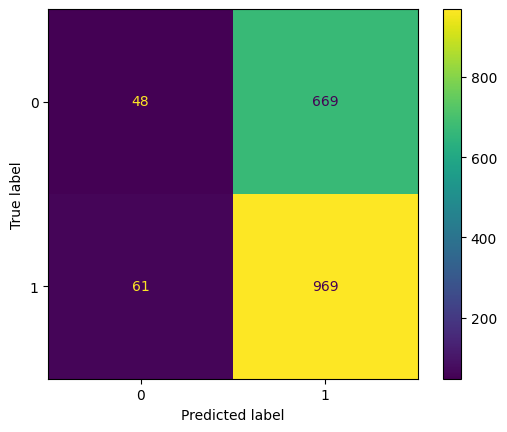

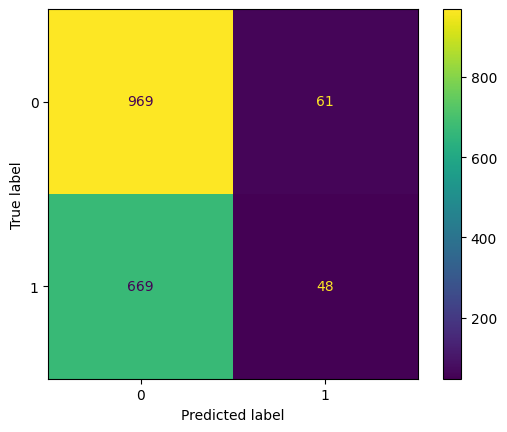

In [108]:
cm_aw_lgr = confusion_matrix(y_aw_test, lgr_aw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aw_lgr)
disp.plot()
plt.show()

cm_bw_lgr = confusion_matrix(y_bw_test, lgr_bw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bw_lgr)
disp.plot()
plt.show()

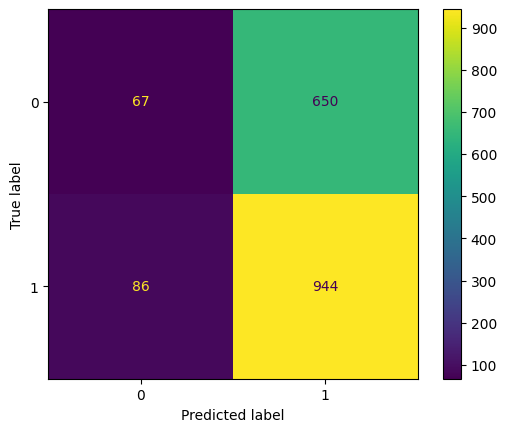

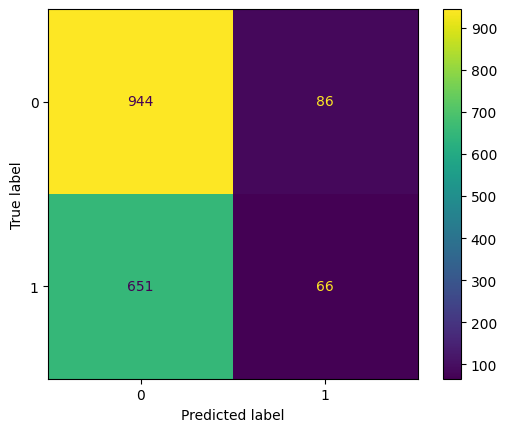

In [109]:
cm_aw_gbc = confusion_matrix(y_aw_test, gbc_aw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aw_gbc)
disp.plot()
plt.show()

cm_bw_gbc = confusion_matrix(y_bw_test, gbc_bw_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bw_gbc)
disp.plot()
plt.show()

`predicting score difference`: regression

In [110]:
X_amb_train, X_amb_test, y_amb_train, y_amb_test = train_test_split(X, y_amb, test_size=0.2, shuffle=True, random_state=1)

# Sanity check:
assert X_amb_train.shape[0] == y_amb_train.shape[0], "the number of data points are different"
assert X_amb_test.shape[0] == y_amb_test.shape[0], "the number of data points are different"

In [111]:
lr_amb = LinearRegression()
lr_amb.fit(X_amb_train, y_amb_train)
lr_amb_pred = lr_amb.predict(X_amb_test)
lr_amb_mse = mean_squared_error(y_amb_test, lr_amb_pred)

lr_amb_mse

43.72947388044684

In [112]:
print("min of pred:", np.min(lr_amb_pred))
print("max of pred:", np.max(lr_amb_pred))
print("====================")
print("coefficients:")
lr_amb.coef_

min of pred: -1.53125
max of pred: 5.1796875
coefficients:


array([ 2.40220557e+12,  2.40220557e+12,  2.40220557e+12,  2.40220557e+12,
        2.40220557e+12,  2.40220557e+12,  2.40220557e+12,  2.40220557e+12,
        2.40220557e+12,  2.40220557e+12,  2.40220557e+12,  2.40220557e+12,
        2.40220557e+12,  2.40220557e+12,  2.40220557e+12,  2.40220557e+12,
        2.40220557e+12,  2.40220557e+12,  2.40220557e+12,  7.34612313e+12,
        7.34612313e+12,  7.34612313e+12,  7.34612313e+12,  7.34612313e+12,
        7.34612313e+12,  7.34612313e+12,  7.34612313e+12,  7.34612313e+12,
        7.34612313e+12,  7.34612313e+12,  7.34612313e+12,  7.34612313e+12,
        7.34612313e+12,  7.34612313e+12,  7.34612313e+12,  7.34612313e+12,
        7.34612313e+12,  7.34612313e+12, -1.10923381e+13, -1.10923381e+13,
       -1.10923381e+13, -1.10923381e+13, -1.10923381e+13, -1.10923381e+13,
       -1.10923381e+13, -1.10923381e+13])

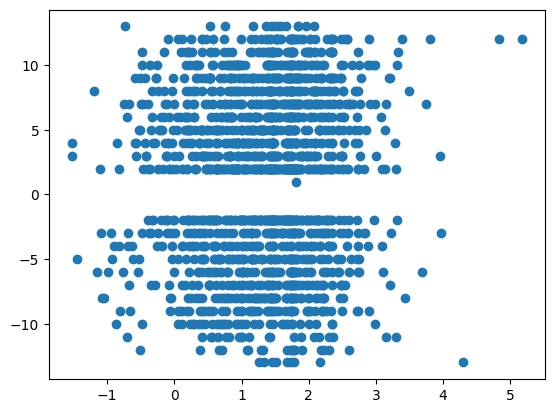

In [113]:
plt.scatter(lr_amb_pred, y_amb_test)
plt.xlabel = "prediction"
plt.ylabel = "true value"
plt.show()

### Work with smaller set of tournaments?

In [114]:
stage1 = ["Champions Tour Stage 1: EMEA Challengers",
"Champions Tour North America Stage 1: Challengers",
"Champions Tour Latin America Stage 1: Playoffs",
"Champions Tour LATAM/BR Stage 1: Last Chance Qualifier",
"Champions Tour Asia-Pacific Stage 1: Challengers Playoffs",
"Champions Tour Korea Stage 1: Challengers",
"Champions Tour Japan Stage 1: Challengers Playoffs",
"Valorant Champions Tour Stage 1: Masters Reykjavík"]

# Stage 2
stage2 = ["Champions Tour EMEA Stage 2: Challengers",
"Champions Tour North America Stage 2: Challengers",
"Champions Tour LATAM/BR Stage 2: Last Chance Qualifier",
"Champions Tour Brazil Stage 2: Challengers",
"Champions Tour Asia-Pacific Stage 2: Challengers Playoffs",
"Champions Tour Korea Stage 2: Challengers",
"Champions Tour Japan Stage 2: Challengers Playoffs",
"Valorant Champions Tour Stage 2: Masters Copenhagen"]

# Champions
champions = ["Champions Tour EMEA: Last Chance Qualifier",
"Champions Tour North America: Last Chance Qualifier",
"Champions Tour South America: Last Chance Qualifier",
"Champions Tour Asia-Pacific: Last Chance Qualifier",
"Champions Tour East Asia: Last Chance Qualifier",
"Valorant Champions 2022"]

vct_2022_stages = {"stage 1": stage1, "stage 2": stage2, "champions": champions}

In [115]:
tier1_tournaments = set()

for stage, tournaments in vct_2022_stages.items():
    tier1_tournaments = tier1_tournaments.union(set(vct_2022_stages[stage]))
                                                
len(tier1_tournaments)

22

In [116]:
tier1_vct_2022_agent_pick = vct_2022_agent_pick[vct_2022_agent_pick["Tournament"].isin(tier1_tournaments)]


In [117]:
high_score_diff_vct_2022_agent_pick = vct_2022_agent_pick[abs(vct_2022_agent_pick["Team A Score"] - vct_2022_agent_pick["Team B Score"]) > 6]

In [118]:
Z_features = ['cypher_A', 'sova_A', 'chamber_A',
       'sage_A', 'breach_A', 'neon_A', 'reyna_A', 'fade_A', 'viper_A',
       'kayo_A', 'killjoy_A', 'yoru_A', 'brimstone_A', 'astra_A', 'phoenix_A',
       'skye_A', 'omen_A', 'raze_A', 'jett_A', 'cypher_B', 'sova_B',
       'chamber_B', 'sage_B', 'breach_B', 'neon_B', 'reyna_B', 'fade_B',
       'viper_B', 'kayo_B', 'killjoy_B', 'yoru_B', 'brimstone_B', 'astra_B',
       'phoenix_B', 'skye_B', 'omen_B', 'raze_B', 'jett_B',
       'map_Ascent', 'map_Bind', 'map_Breeze', 'map_Fracture',
       'map_Haven', 'map_Icebox', 'map_Pearl', 'map_Split']


Z = high_score_diff_vct_2022_agent_pick[X_features]
w_aw = high_score_diff_vct_2022_agent_pick["Team_A_win"]
w_bw = high_score_diff_vct_2022_agent_pick["Team_B_win"]
w_amb = high_score_diff_vct_2022_agent_pick["Team A Score"] - high_score_diff_vct_2022_agent_pick["Team B Score"]
w_bma = high_score_diff_vct_2022_agent_pick["Team B Score"] - high_score_diff_vct_2022_agent_pick["Team A Score"]

In [119]:
lgr_aw2 = LogisticRegression()
lgr_bw2 = LogisticRegression()

gbc_aw2 = GradientBoostingClassifier()
gbc_bw2 = GradientBoostingClassifier()

In [120]:
Z_aw_train, Z_aw_test, w_aw_train, w_aw_test = train_test_split(Z, w_aw, test_size=0.2, random_state=1, shuffle=True)
Z_bw_train, Z_bw_test, w_bw_train, w_bw_test = train_test_split(Z, w_bw, test_size=0.2, random_state=1, shuffle=True)

In [121]:
lgr_aw2.fit(Z_aw_train, w_aw_train)
lgr_aw2_pred = lgr_aw2.predict(Z_aw_test)
lgr_aw2_acc = accuracy_score(w_aw_test, lgr_aw2_pred)

lgr_bw2.fit(Z_bw_train, w_bw_train)
lgr_bw2_pred = lgr_bw.predict(Z_bw_test)
lgr_bw2_acc = accuracy_score(w_bw_test, lgr_bw2_pred)

print("lgr_aw accuracy:", lgr_aw2_acc)
print("lgr_bw accuracy:", lgr_bw2_acc)
print("mean of lgr_aw_pred: {}".format(np.mean(lgr_aw2_pred)))
print("mean of aw_test: {}".format(np.mean(w_aw_test)))
print("mean of lgr_bw_pred: {}".format(np.mean(lgr_bw2_pred)))
print("mean of bw_test: {}".format(np.mean(w_bw_test)))
print("coefficients:", lgr_aw2.coef_)

lgr_aw accuracy: 0.6156914893617021
lgr_bw accuracy: 0.625
mean of lgr_aw_pred: 0.9321808510638298
mean of aw_test: 0.6223404255319149
mean of lgr_bw_pred: 0.061170212765957445
mean of bw_test: 0.3776595744680851
coefficients: [[ 0.31938142  0.28250723  0.17949606  0.03562811 -0.17557324 -0.09284241
  -0.12740358 -0.26364285  0.13831405 -0.13236569  0.24702504  1.1331388
  -0.0601049   0.06543685 -0.55227239 -0.05800103 -0.16429248  0.1885808
  -0.11845053 -0.06316856 -0.23412975  0.15634544  0.04871773  0.15701352
   0.07416369  0.3581144  -0.09327585 -0.08844763  0.28007067 -0.24609425
   0.19629568 -0.24982285 -0.00135166  0.45963432  0.3724758  -0.26995153
  -0.02478676  0.01275689  0.20782293 -0.08158098 -0.1342492   0.0243091
   0.20667365  0.11579242  0.11323148 -0.28308756]]


In [122]:
gbc_aw2.fit(Z_aw_train, w_aw_train)
gbc_aw2_pred = gbc_aw.predict(Z_aw_test)
gbc_aw2_acc = accuracy_score(w_aw_test, gbc_aw2_pred)

gbc_bw2.fit(Z_bw_train, w_bw_train)
gbc_bw2_pred = gbc_bw.predict(Z_bw_test)
gbc_bw2_acc = accuracy_score(w_bw_test, gbc_bw2_pred)

print("gbc_aw accuracy:", gbc_aw2_acc)
print("gbc_bw accuracy:", gbc_bw2_acc)
print("mean of gbc_aw_pred: {}".format(np.mean(gbc_aw2_pred)))
print("mean of aw_test: {}".format(np.mean(w_aw_test)))
print("mean of gbc_bw_pred: {}".format(np.mean(gbc_bw2_pred)))
print("mean of bw_test: {}".format(np.mean(w_bw_test)))

gbc_aw accuracy: 0.6303191489361702
gbc_bw accuracy: 0.6303191489361702
mean of gbc_aw_pred: 0.9361702127659575
mean of aw_test: 0.6223404255319149
mean of gbc_bw_pred: 0.06382978723404255
mean of bw_test: 0.3776595744680851


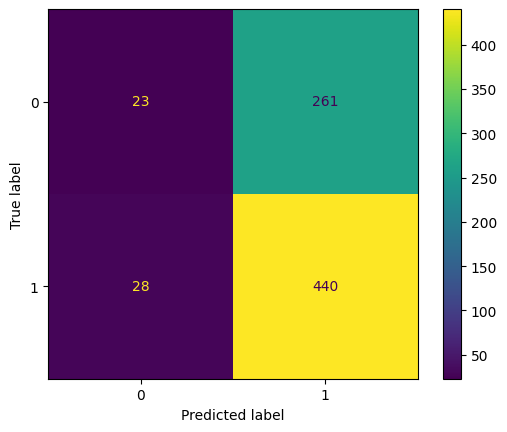

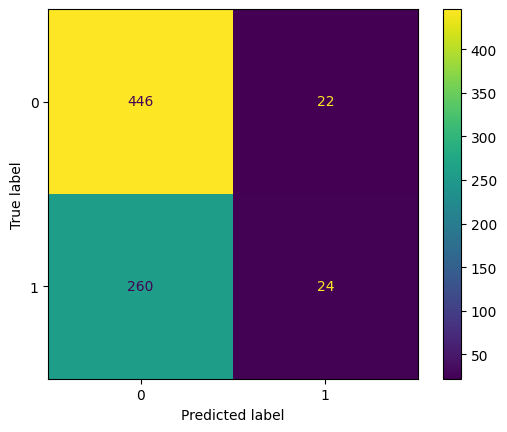

In [123]:
cm_aw2_lgr = confusion_matrix(w_aw_test, lgr_aw2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aw2_lgr)
disp.plot()
plt.show()

cm_bw2_lgr = confusion_matrix(w_bw_test, lgr_bw2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bw2_lgr)
disp.plot()
plt.show()

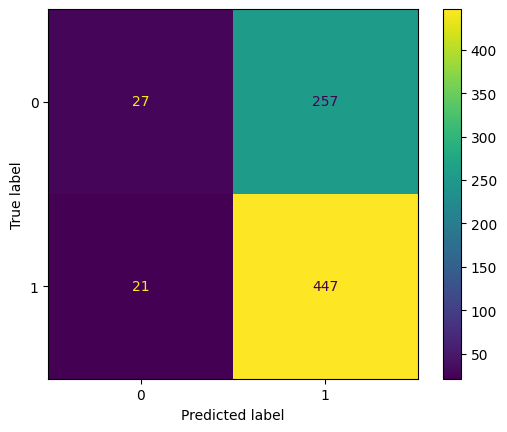

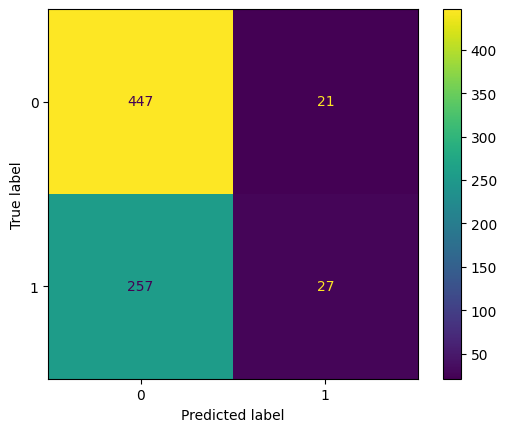

In [125]:
cm_aw2_gbc = confusion_matrix(w_aw_test, gbc_aw2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_aw2_gbc)
disp.plot()
plt.show()

cm_bw2_gbc = confusion_matrix(w_bw_test, gbc_bw2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bw2_gbc)
disp.plot()
plt.show()

### Try LinearRegresson

In [126]:
Z_amb_train, Z_amb_test, w_amb_train, w_amb_test = train_test_split(Z, w_amb, test_size=0.2, shuffle=True, random_state=1)

# Sanity check:
assert Z_amb_train.shape[0] == w_amb_train.shape[0], "the number of data points are different"
assert Z_amb_test.shape[0] == w_amb_test.shape[0], "the number of data points are different"

In [127]:
# Linear regression on score diff
lr_amb2 = LinearRegression()
lr_amb2.fit(Z_amb_train, w_amb_train)
lr_amb2_pred = lr_amb.predict(Z_amb_test)
lr_amb2_mse = mean_squared_error(w_amb_test, lr_amb2_pred)

lr_amb2_mse

82.06611690115422

In [128]:
print("min of pred:", np.min(lr_amb2_pred))
print("max of pred:", np.max(lr_amb2_pred))
print("====================")
print("coefficients:")
lr_amb2.coef_

min of pred: -1.4296875
max of pred: 4.3125
coefficients:


array([ 9.37096428e+12,  9.37096428e+12,  9.37096428e+12,  9.37096428e+12,
        9.37096428e+12,  9.37096428e+12,  9.37096428e+12,  9.37096428e+12,
        9.37096428e+12,  9.37096428e+12,  9.37096428e+12,  9.37096428e+12,
        9.37096428e+12,  9.37096428e+12,  9.37096428e+12,  9.37096428e+12,
        9.37096428e+12,  9.37096428e+12,  9.37096428e+12, -6.14493126e+13,
       -6.14493126e+13, -6.14493126e+13, -6.14493126e+13, -6.14493126e+13,
       -6.14493126e+13, -6.14493126e+13, -6.14493126e+13, -6.14493126e+13,
       -6.14493126e+13, -6.14493126e+13, -6.14493126e+13, -6.14493126e+13,
       -6.14493126e+13, -6.14493126e+13, -6.14493126e+13, -6.14493126e+13,
       -6.14493126e+13, -6.14493126e+13, -5.55172633e+13, -5.55172633e+13,
       -5.55172633e+13, -5.55172633e+13, -5.55172633e+13, -5.55172633e+13,
       -5.55172633e+13, -5.55172633e+13])

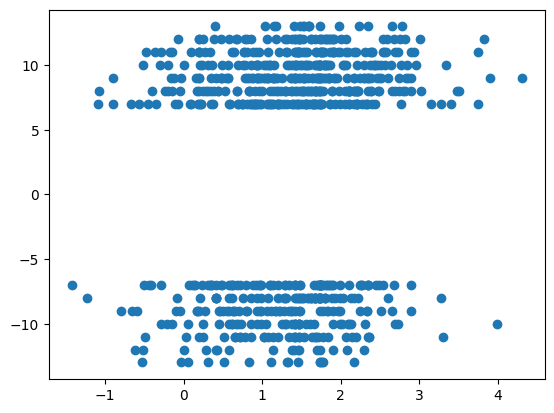

In [129]:
plt.scatter(lr_amb2_pred, w_amb_test)
plt.xlabel = "prediction"
plt.ylabel = "true value"
plt.show()

In [ ]:
raise ValueError("Stop here!")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
Xz_train, Xz_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=1, shuffle=True)

### LogisticRegression to predict "Team A win"

In [ ]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)

acc

In [ ]:
np.mean(pred)

In [ ]:
print(np.min(lr.coef_), np.max(lr.coef_))

### GradientBoostingClassifier to predict "Team A win"

In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=1, learning_rate=0.1)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

gb_acc

In [ ]:
np.mean(gb_pred)

### LinearRegression to predict score difference

In [ ]:
lnr = LinearRegression()
lnr.fit(Xz_train, z_train)
lnr_pred = lnr.predict(Xz_test)
lnr_mse = MSE(z_test, lnr_pred)

lnr_mse

In [ ]:
print(np.min(lnr_pred), np.max(lnr_pred))

In [ ]:
lnr_pred

In [ ]:
lnr.coef_

In [ ]:
print(len(np.unique(lnr.coef_)), len(lnr.coef_))

### GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(Xz_train, z_train)
gbr_pred = gbr.predict(Xz_test)
gbr_mse = MSE(z_test, gbr_pred)

gbr_mse

### Polynomial regression

In [ ]:
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, z_train_poly, z_test_poly = train_test_split(X_poly, z, test_size=0.2, random_state=1, shuffle=True)
polylr = LinearRegression()
polylr.fit(X_train_poly, z_train_poly)
poly_pred = polylr.predict(X_test_poly)
poly_mse = MSE(poly_pred, z_test_poly)

poly_mse

In [ ]:
import pycaret
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

In [ ]:
exp = RegressionExperiment()
exp.setup(X, target=y)

In [ ]:
best = exp.compare_models()

In [ ]:
plot_model(best, plot="residuals")

In [ ]:
plot_model(best, plot="residuals")

In [ ]:
raise ValueError("hello! stop here!")